# <center> <h1>   🌡️🥵  👨‍💻🥶 🌡️ 

In [1]:
import tensorflow as tf
import torch
import numpy as np

# <center> Celsius to Fahrenheit table
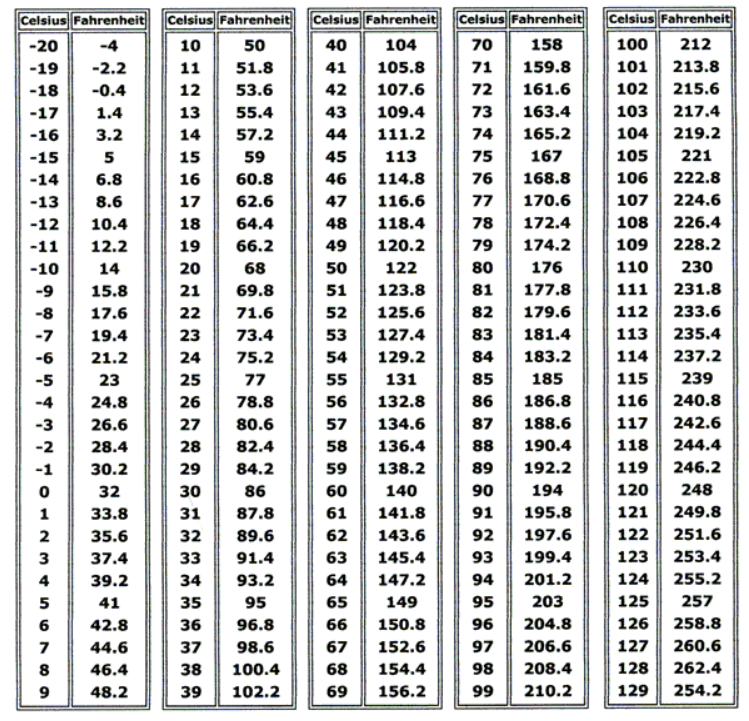

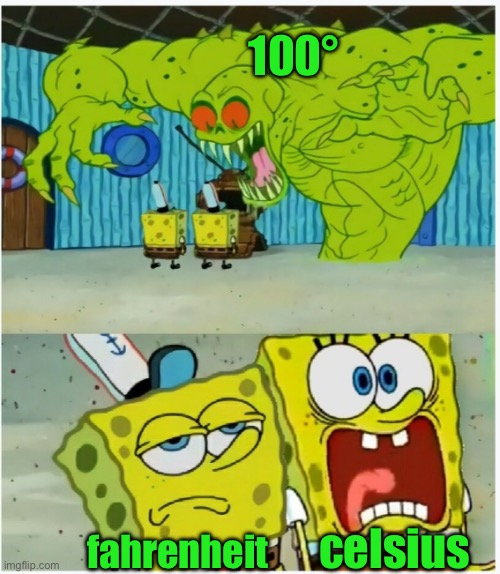

Deep learning

1 - forward calculation

2 - loss is found

3 - backward is calculated (weight and bias are adjusted)

------------------

1 - y_hat = w1*w1 + w2*x2 + .... + b



2 - loss = Mean Squared Error, Mean Absulote Error and others

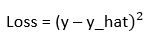

3 - SGD(Stochastic Gradient Descent) = w = wi - lr * dLoss/dw,    b = bi - lr * dLoss/db

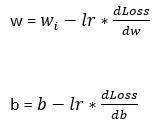

# <center> From scratch in python

In [81]:
x = np.array([0,-1,1,-2,2,-3,3,-4,4,-5,5])
y = np.array([32.8,30.2,33.8,28.4,35.6,26.6,37.4,24.8,39.2,23.0,41.0])

In [82]:
w = np.random.randint(1,10)      # We will choose the weight randomly
b = np.random.randint(1,10)      # # We will choose the bias randomly

lr = 0.001   # learning rate

epochs = 1000     

for epoch in range(epochs):
    for x_i, y_i in zip(x,y):
        
        y_hat = w * x_i + b     # forward calculation
        
        loss = (y_i - y_hat)**2     # loss calculation (Mean Squared Error)
        
        w-= (-2 * lr * x_i * (y_i - y_hat))     # bacward calculation
        b-= (-2 * lr * (y_i - y_hat))           # backward calculation
         
        
    if epoch % 100 == 0:
        print("Loss: ",loss)
        print("Weight: ", w, " Bias: ", b, "\n")
        

Loss:  723.502706287022
Weight:  1.9810069676413038  Bias:  5.59565583485343 

Loss:  8.289817611268539
Weight:  1.8122699929464514  Bias:  29.20916432427428 

Loss:  0.060291803215819
Weight:  1.801072569330963  Bias:  31.76186154311664 

Loss:  0.0015340347737195581
Weight:  1.799862077012387  Bias:  32.03781969960375 

Loss:  0.004892340717453381
Weight:  1.7997312172981161  Bias:  32.06765202894138 

Loss:  0.005368868995294366
Weight:  1.7997170707690089  Bias:  32.070877039156834 

Loss:  0.005421710061462577
Weight:  1.7997155414649988  Bias:  32.07122567740008 

Loss:  0.005427437919275238
Weight:  1.799715376140294  Bias:  32.07126336677665 

Loss:  0.00542805730783417
Weight:  1.7997153582679426  Bias:  32.07126744116935 

Loss:  0.005428124268655729
Weight:  1.7997153563358603  Bias:  32.07126788162963 



# <center> Predict

In [83]:
inp = int(input("value="))
print(w * inp + b)

value=-11
12.274399011712415


# <center> Implementation in Pytorch

In [84]:
x = torch.tensor([[0.0],
                 [-1.0],
                 [1.0],
                 [-2.0],
                 [2.0],
                 [-3.0],
                 [3.0],
                 [-4.0],
                 [4.0],
                 [-5.0],
                 [5.0]])

y = torch.tensor([[32.8],
                 [30.2],
                 [33.8],
                 [28.4],
                 [35.6],
                 [26.6],
                 [37.4],
                 [24.8],
                 [39.2],
                 [23.0],
                 [41.0]])

In [85]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)     #1 neuron in input 1 neuron in output
        
    def forward(self,x):
        y_hat = self.linear(x)      # forward calculation
        return y_hat 
    

In [86]:
model = Model()

loss = torch.nn.MSELoss(reduction="sum")     # loss calculation
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)     # backwad calculation

In [87]:
epochs = 1000

for epoch in range(epochs):
    
    y_bash = model(x)     # forward calculation
    
    Loss = loss(y_bash,y)     # loss calculation
    
    optimizer.zero_grad()    # setting the optimizer to 0
    
    Loss.backward()     # backwad calculation
    
    optimizer.step()    # taking the optimizer to the next step
    
    if epoch % 100 == 0:
        print("Loss",Loss)

Loss tensor(11879.1006, grad_fn=<MseLossBackward0>)
Loss tensor(132.6353, grad_fn=<MseLossBackward0>)
Loss tensor(2.1253, grad_fn=<MseLossBackward0>)
Loss tensor(0.5999, grad_fn=<MseLossBackward0>)
Loss tensor(0.5820, grad_fn=<MseLossBackward0>)
Loss tensor(0.5818, grad_fn=<MseLossBackward0>)
Loss tensor(0.5818, grad_fn=<MseLossBackward0>)
Loss tensor(0.5818, grad_fn=<MseLossBackward0>)
Loss tensor(0.5818, grad_fn=<MseLossBackward0>)
Loss tensor(0.5818, grad_fn=<MseLossBackward0>)


In [88]:
model.parameters()

<generator object Module.parameters at 0x000001A67B6317B0>

In [89]:
list(model.parameters())

[Parameter containing:
 tensor([[1.8000]], requires_grad=True),
 Parameter containing:
 tensor([32.0726], requires_grad=True)]

In [90]:
weight = list(model.parameters())[0].data
weight

tensor([[1.8000]])

In [91]:
bias = list(model.parameters())[1].data
bias

tensor([32.0726])

# <center> Predict

In [93]:
inp = int(input("value="))
print(weight * inp + bias)

value=10
tensor([[50.0726]])


# <center> Implementation in Tensorflow

In [2]:
x = np.array([0,-1,1,-2,2,-3,3,-4,4,-5,5])
y = np.array([32.8,30.2,33.8,28.4,35.6,26.6,37.4,24.8,39.2,23.0,41.0])

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], activation="linear")     # 1 neuron in input 1 neuron in output
])

In [4]:
loss = tf.keras.losses.MeanSquaredError(reduction="sum")     # loss calculation
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)     # bacward calculation

In [5]:
model.compile(optimizer=optimizer, loss=loss, metrics="accuracy")

In [6]:
model.fit(x,y,epochs=1000)     #traning

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 11356.8232 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 10848.3809 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 10367.6484 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 9911.2334 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 9476.7500 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 0s/step - loss: 9062.4297 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 8666.9053 - accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 8289.0576 - accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 7927.9370 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [============================

1/1 [==============================] - 0s 16ms/step - loss: 12.0292 - accuracy: 0.0000e+00
Epoch 157/1000
1/1 [==============================] - 0s 16ms/step - loss: 11.5310 - accuracy: 0.0000e+00
Epoch 158/1000
1/1 [==============================] - 0s 0s/step - loss: 11.0545 - accuracy: 0.0000e+00
Epoch 159/1000
1/1 [==============================] - 0s 9ms/step - loss: 10.5988 - accuracy: 0.0000e+00
Epoch 160/1000
1/1 [==============================] - 0s 0s/step - loss: 10.1629 - accuracy: 0.0000e+00
Epoch 161/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.7460 - accuracy: 0.0000e+00
Epoch 162/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.3472 - accuracy: 0.0000e+00
Epoch 163/1000
1/1 [==============================] - 0s 0s/step - loss: 8.9658 - accuracy: 0.0000e+00
Epoch 164/1000
1/1 [==============================] - 0s 0s/step - loss: 8.6009 - accuracy: 0.0000e+00
Epoch 165/1000
1/1 [==============================] - 0s 0s/step - loss: 8

Epoch 313/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5924 - accuracy: 0.0000e+00
Epoch 314/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5919 - accuracy: 0.0000e+00
Epoch 315/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5915 - accuracy: 0.0000e+00
Epoch 316/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5911 - accuracy: 0.0000e+00
Epoch 317/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5907 - accuracy: 0.0000e+00
Epoch 318/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5903 - accuracy: 0.0000e+00
Epoch 319/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.5899 - accuracy: 0.0000e+00
Epoch 320/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5896 - accuracy: 0.0000e+00
Epoch 321/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5892 - accuracy: 0.0000e+00
Epoch 322/1000
1/1 [==============================] - 0s 0s/ste

1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 471/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 472/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 473/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 474/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 475/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 476/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 477/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 478/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 479/1000
1/1 [==============================] - 0s 0s/step - loss: 0.581

1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 550/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 551/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 552/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 553/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 554/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 555/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 556/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 557/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 558/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5818 -

1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 629/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 630/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 631/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 632/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 633/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 634/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 635/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 636/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 637/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 -

Epoch 707/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 708/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 709/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 710/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 711/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 712/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 713/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 714/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 715/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 716/1000
1/1 [==============================] - 0s 16ms/ste

1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 864/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 865/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 866/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 867/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 868/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 869/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 870/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 871/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 872/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5

Epoch 942/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 943/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 944/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 945/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 946/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 947/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 948/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 949/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 950/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5818 - accuracy: 0.0000e+00
Epoch 951/1000
1/1 [==============================] - 0s 10ms/st

# <center> Predict

In [7]:
print(model.predict([20]))

1/1 [==============================] - 0s 79ms/step
[[68.07265]]


# <center> <h1>👨‍💻   🚀  